In [270]:
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sma

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
import statsmodels.stats.api as ssa
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector


# READ DATASET

In [271]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# CHECK DATATYPES

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [273]:
(df.isnull().sum()/len(df))*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [274]:
for i in df.columns:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        df[i].fillna(df[i].median(),inplace=True)

In [275]:
(df.isnull().sum()/len(df))*100

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64



Skewness of fixed acidity: 1.7247850758104883


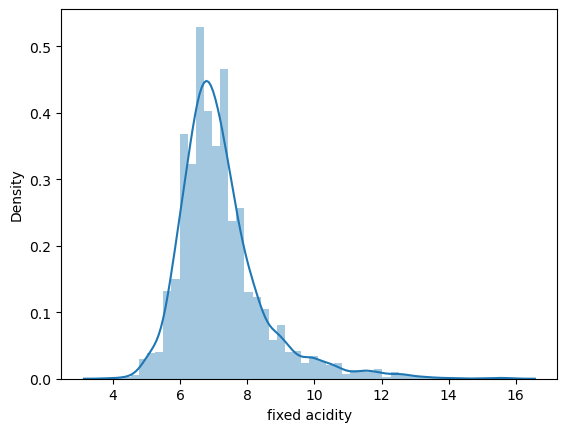



Skewness of volatile acidity: 1.4972628999122204


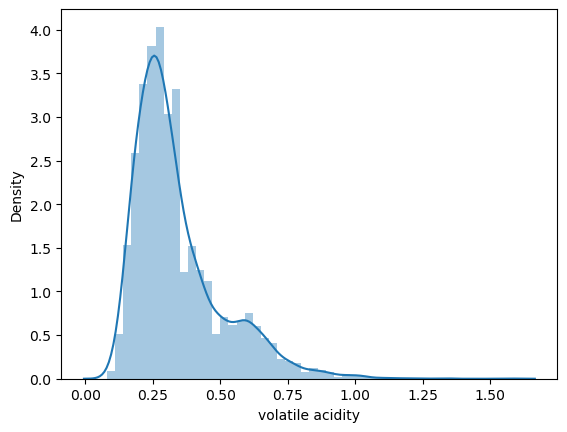



Skewness of citric acid: 0.4732235614244566


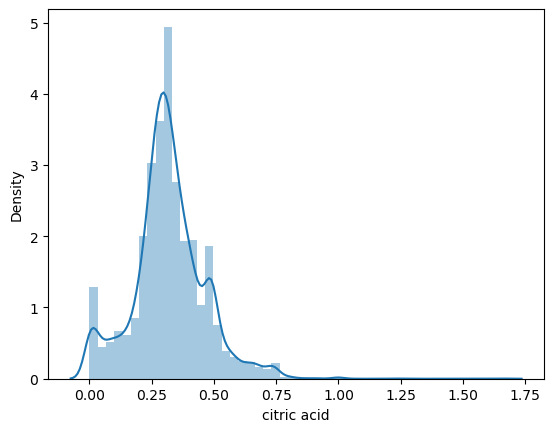



Skewness of residual sugar: 1.4354786079532


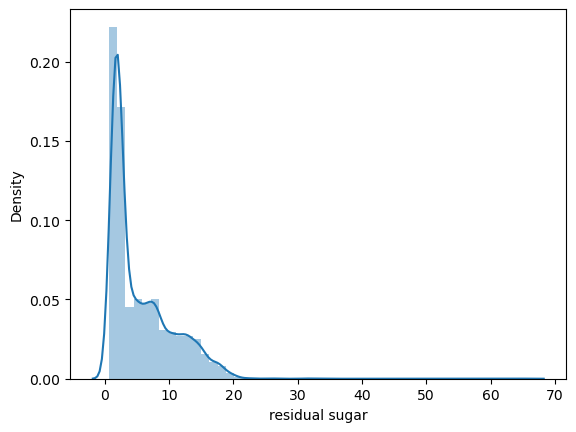



Skewness of chlorides: 5.400746735708432


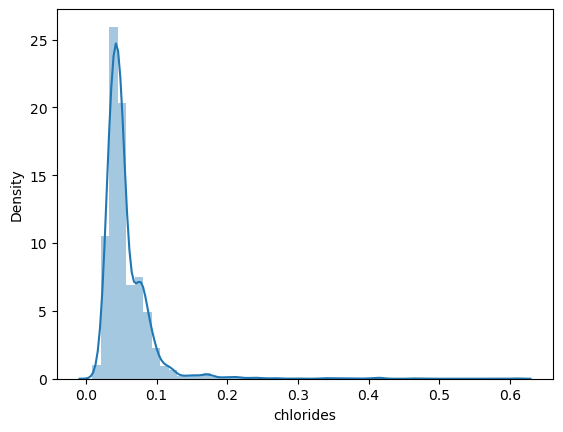



Skewness of free sulfur dioxide: 1.2200660740665203


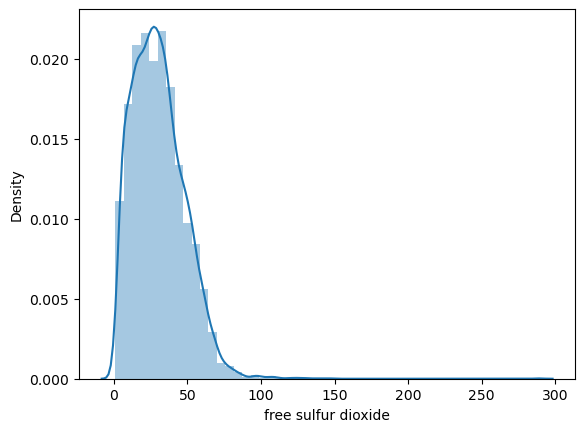



Skewness of total sulfur dioxide: -0.001177478234437964


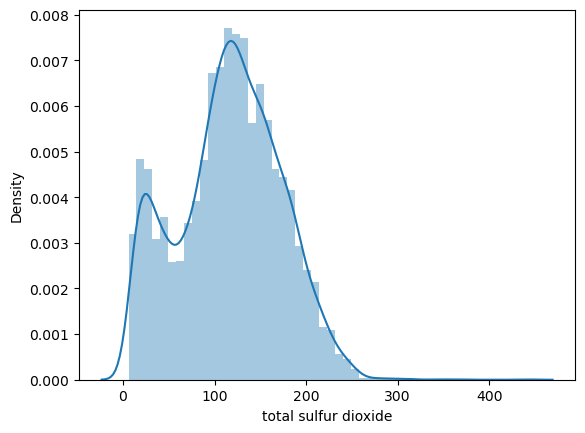



Skewness of density: 0.5036017301419994


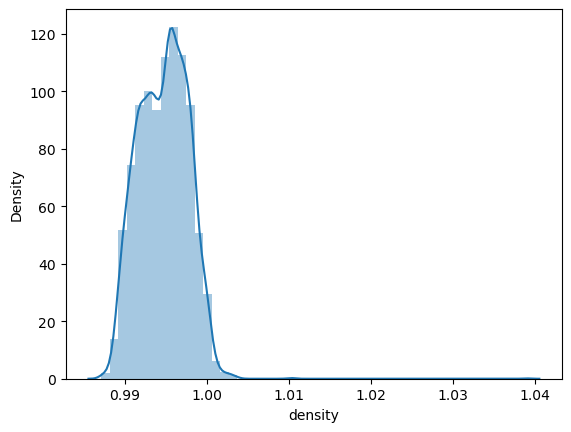



Skewness of pH: 0.3874489801112806


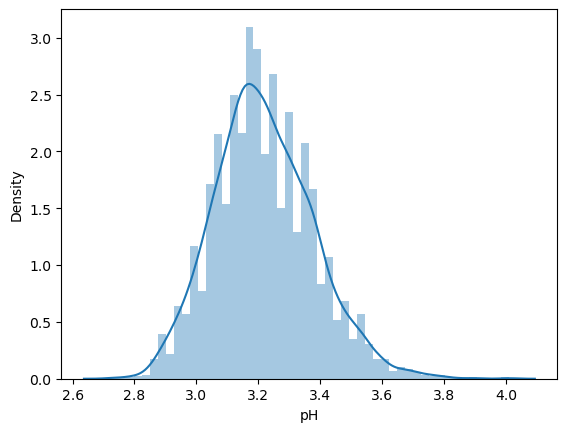



Skewness of sulphates: 1.7992485794763067


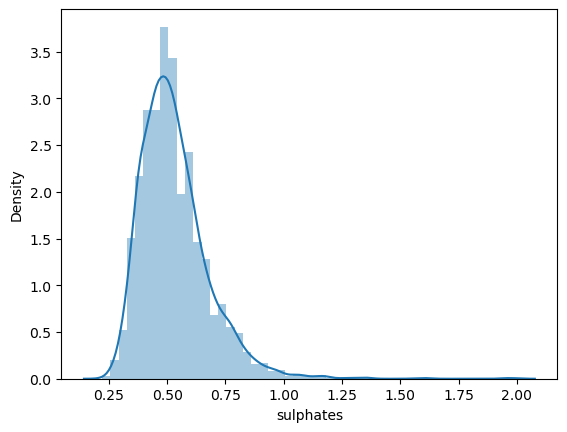



Skewness of alcohol: 0.5657177290960251


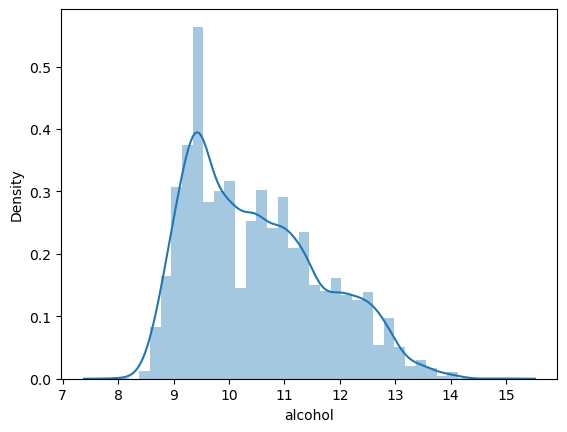



Skewness of quality: 0.1896226933726968


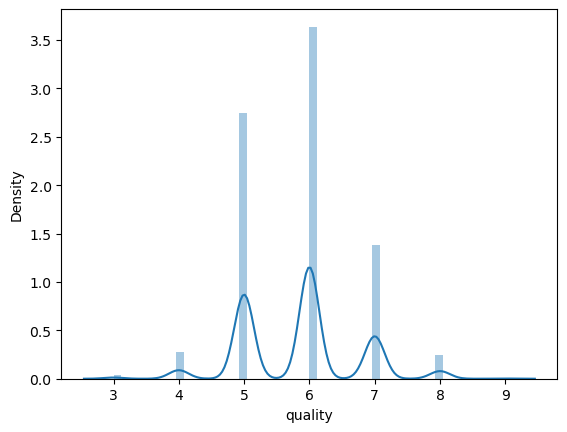

In [276]:
for i in df.columns:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        print()
        sns.distplot(df[i])
        print(f'\nSkewness of {i}:',df[i].skew())
        plt.show()
        

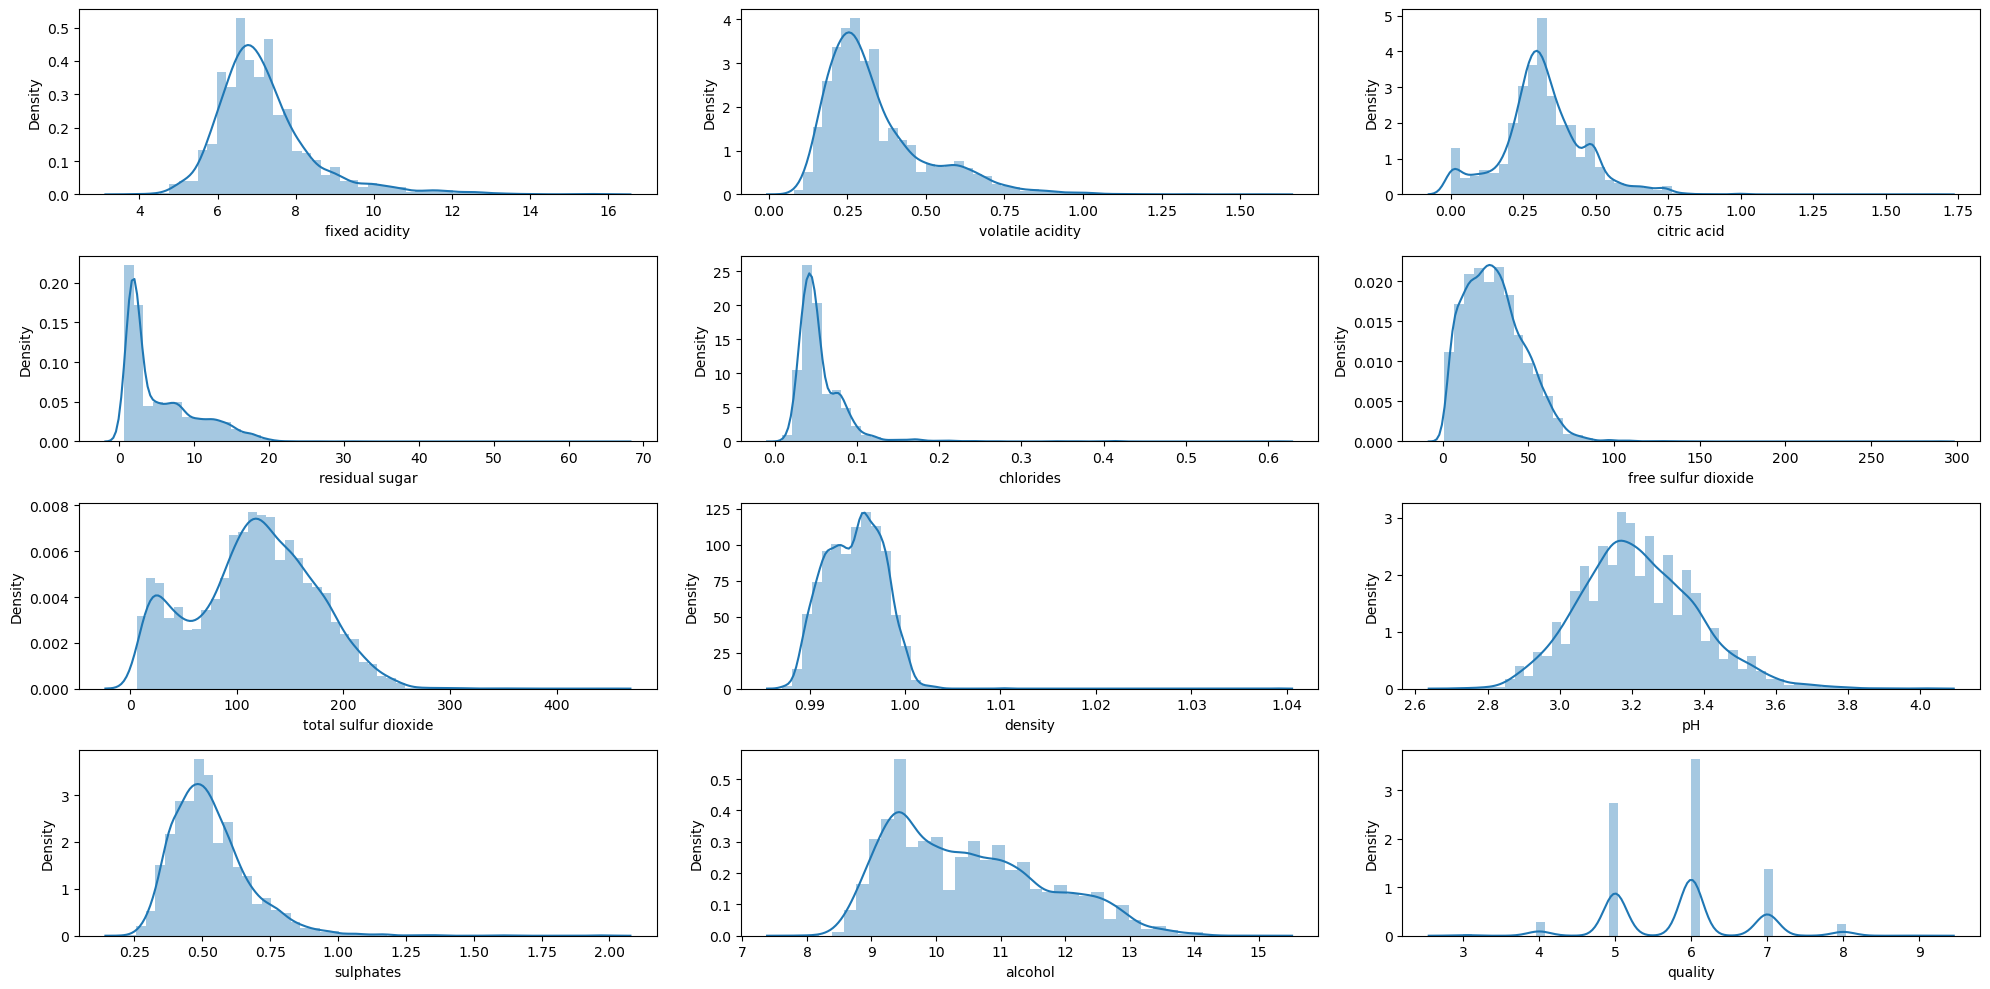

In [277]:
cols=list(df.select_dtypes(include=np.number).columns)

fig, ax= plt.subplots(4,3, figsize=(20,10))

for i, subplot in zip(cols, ax.flatten()):
    sns.distplot(df[i], ax=subplot,kde=True)
    
plt.tight_layout()
plt.show()

# OUTLIER TREATMENT

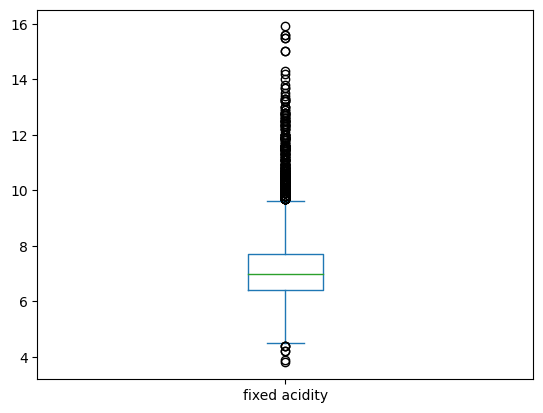

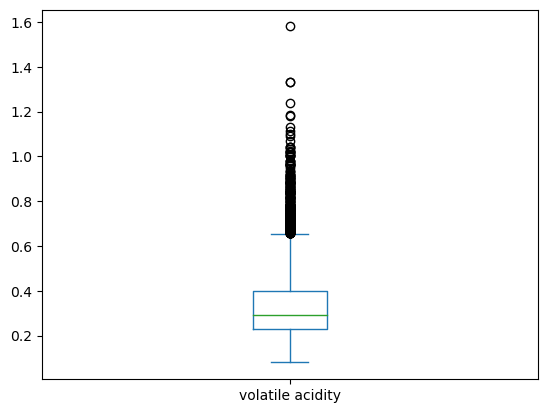

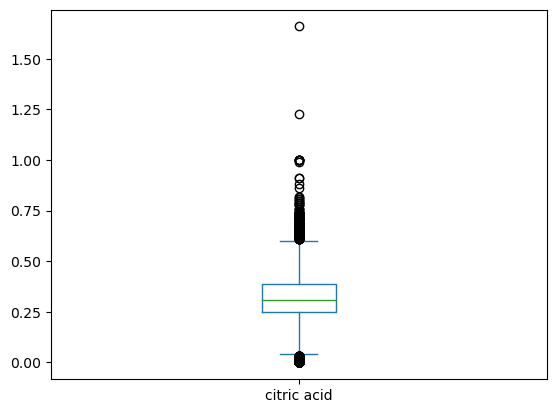

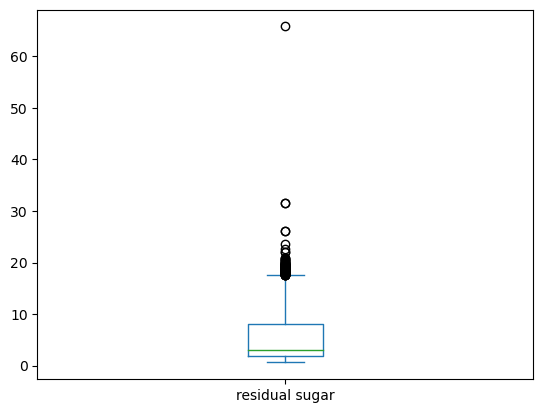

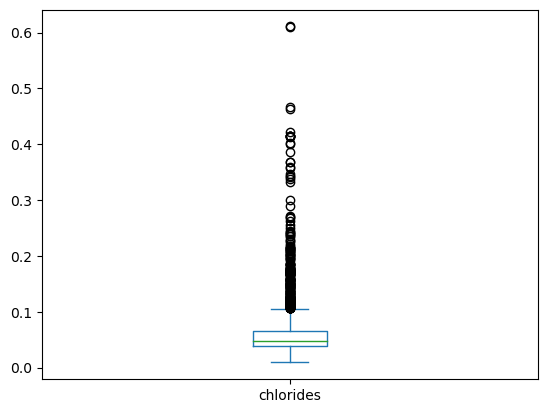

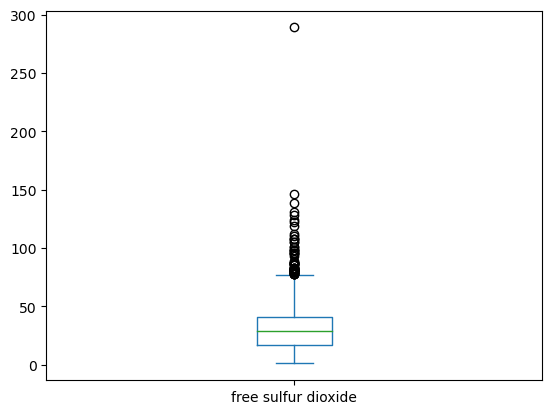

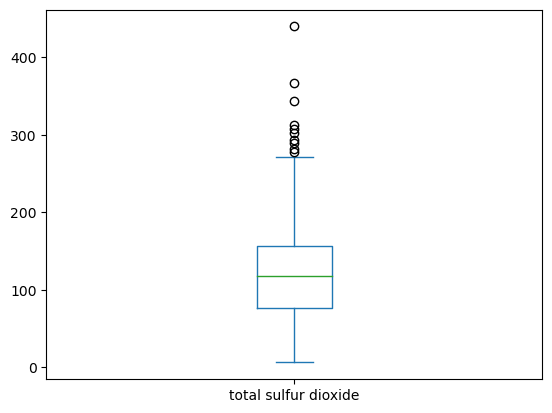

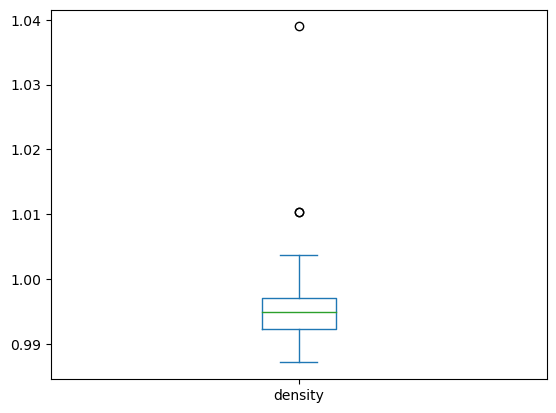

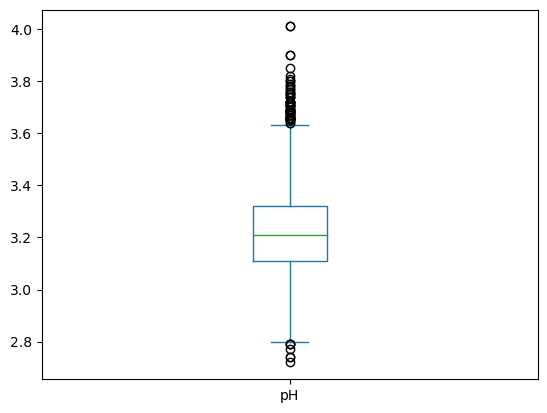

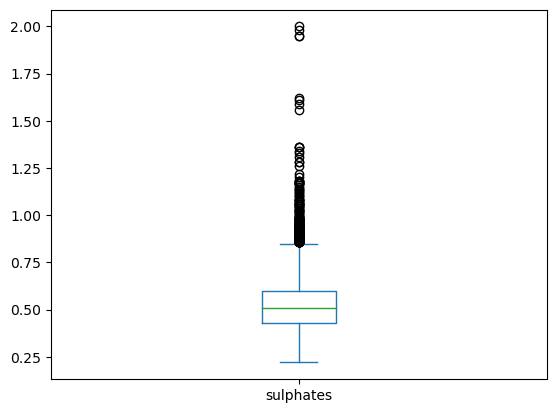

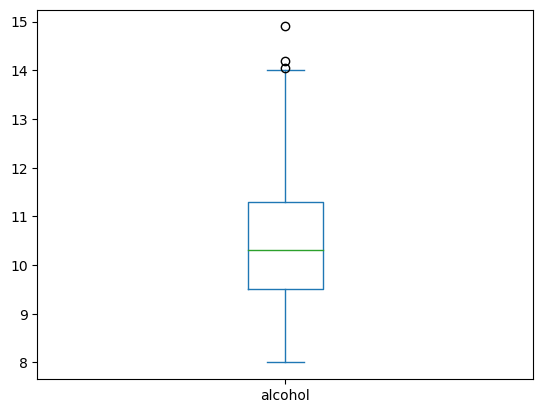

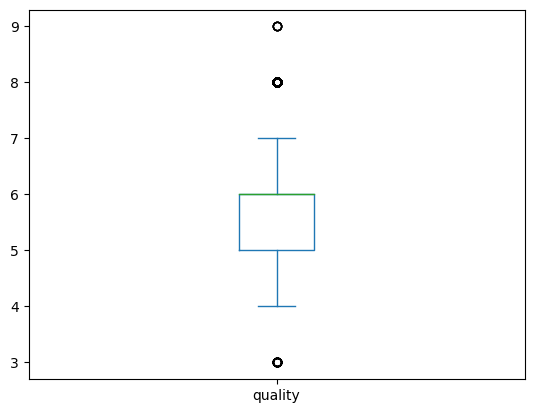

In [278]:
df_num = df.select_dtypes(include=np.number)

cols=list(df.select_dtypes(include=np.number).columns)


for i in cols:
    df[i].plot(kind='box')
    plt.show()

In [279]:
for i in df.columns:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        print(f'\nSkewness of {i}:',df[i].skew())


Skewness of fixed acidity: 1.7247850758104883

Skewness of volatile acidity: 1.4972628999122204

Skewness of citric acid: 0.4732235614244566

Skewness of residual sugar: 1.4354786079532

Skewness of chlorides: 5.400746735708432

Skewness of free sulfur dioxide: 1.2200660740665203

Skewness of total sulfur dioxide: -0.001177478234437964

Skewness of density: 0.5036017301419994

Skewness of pH: 0.3874489801112806

Skewness of sulphates: 1.7992485794763067

Skewness of alcohol: 0.5657177290960251

Skewness of quality: 0.1896226933726968


In [280]:

q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)

iqr = q3-q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df = df[~((df_num>upper)|(df_num<lower)).any(axis=1)]

for i in df.columns:
    if df[i].dtype == 'float64' or df[i].dtype == 'int64':
        print(f'\nSkewness of {i}:',df[i].skew())



Skewness of fixed acidity: 0.4841956123860119

Skewness of volatile acidity: 1.0148513162941093

Skewness of citric acid: 0.0598892002924392

Skewness of residual sugar: 0.8788350979088208

Skewness of chlorides: 1.0479858655600294

Skewness of free sulfur dioxide: 0.3571606080458972

Skewness of total sulfur dioxide: -0.11063373758820959

Skewness of density: 0.020947125982899675

Skewness of pH: 0.16541870533507436

Skewness of sulphates: 0.5845561129749436

Skewness of alcohol: 0.50590810296425

Skewness of quality: -0.06471372419667919


## ENCODING THE DATA

In [281]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat = pd.get_dummies(df_cat,drop_first=True)
df_cat

,type_white
1,1
2,1
3,1
4,1
5,1
...,...
6492,0
6493,0
6494,0
6495,0


In [282]:
final_df = pd.concat([df_cat,df],axis=1)
final_df

,type_white,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,1,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,0,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [283]:
final_df.drop('type',axis=1,inplace=True)

In [284]:
final_df.shape

(4842, 13)

In [285]:
final_df_copy  = final_df
final_df_copy.shape

(4842, 13)


## Base Model Building

In [286]:
lr = LinearRegression()

X = final_df.drop('quality',axis=1)
y = final_df['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

base_model = lr.fit(X_train,y_train)

X_pred = base_model.predict(X_train)
y_pred = base_model.predict(X_test)

y_pred

array([5.68547994, 5.84233826, 5.82949685, ..., 5.8172742 , 5.23259046,
       5.45381109])

In [287]:
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,X_pred)))

RMSE train:  0.640570134377207


In [288]:
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE test:  0.6655654073935503


In [289]:
r2_score(y_test,y_pred)

0.2807688622530804

In [290]:
rf = RandomForestRegressor()

base_model_rf = lr.fit(X_train,y_train)

X_pred_rf = base_model_rf.predict(X_train)
y_pred_rf = base_model_rf.predict(X_test)

y_pred_rf

array([5.68547994, 5.84233826, 5.82949685, ..., 5.8172742 , 5.23259046,
       5.45381109])

In [291]:
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE test:  0.6655654073935503


In [292]:
r2_score(y_test,y_pred_rf)

0.2807688622530804

# Elastic Net Model:

In [293]:
elasticnet = ElasticNet()
elasticnet_BM = elasticnet.fit(X_train,y_train)
elasticnet_pred_BM = elasticnet_BM.predict(X_test)
print('RMSE elasticnet_BM',np.sqrt(mean_squared_error(y_test,elasticnet_pred_BM)))
print('r_square elasticnet_BM',r2_score(y_test,elasticnet_pred_BM))

RMSE elasticnet_BM 0.773742588783288
r_square elasticnet_BM 0.02796925336453726


# OLS MODEL:

In [294]:
X = final_df_copy.drop('quality',axis=1)
y = final_df_copy['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

temp_X = sma.add_constant(X_train)

model_ols = sma.OLS(y_train,temp_X).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     110.9
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          5.68e-233
Time:                        23:54:19   Log-Likelihood:                -3299.3
No. Observations:                3389   AIC:                             6625.
Df Residuals:                    3376   BIC:                             6704.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  138.1010     23.632      5.844      0.000      91.767     184.435
type_white              -0.5562      0.082     -6.812      0.000      -0.716      -0.396
fixed acidity            0.0882      0.024      3.644      0.000       0.041       0.136
volatile acidity        -1.6041      0.128    -12.566      0.000      -1.854      -1.354
citric acid             -0.1554      0.125     -1.241      0.215      -0.401       0.090
residual sugar           0.0738      0.009      8.129      0.000       0.056       0.092
chlorides               -3.0707      1.149     -2.673      0.008      -5.323      -0.818
free sulfur dioxide      0.0051      0.001      5.032      0.000       0.003       0.007
total sulfur dioxide    -0.0007      0.000     -1.799      0.072      -0.002    6.49e-05
density               -136.9044     23.930     -5.721      0.000    -183.822     -89.987
pH                       0.6095      0.121      5.029      0.000       0.372       0.847
sulphates                0.9645      0.113      8.518      0.000       0.742       1.186
alcohol                  0.1355      0.029      4.607      0.000       0.078       0.193
==============================================================================
Omnibus:                        7.884   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.845
Skew:                          -0.110   Prob(JB):                       0.0198
Kurtosis:                       3.086   Cond. No.                     4.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [295]:
# conclusion :  RMse and R2 square values prove to be overfit,since there are noise caused by redundant variables in the dataset.
# We are proceeding with regularisation techniques to perform feature selection and increase bias and build a model based on the refined dataset.

Assumptions : 

a. Linearity : 

In [296]:
#H0 :  Linear
#H1 : NOt Linear

sma.stats.linear_rainbow(model_ols)

(0.9993625027024998, 0.5052520438114234)

b.Normality : 

In [297]:
# H0 : Normal
# H1 : NOt Normal
stats.jarque_bera(model_ols.resid)

Jarque_beraResult(statistic=7.845098930962002, pvalue=0.01979057498476977)

c.Multicollinearity : 

In [298]:
model_ols.condition_number

427170.21457909734

In [299]:
vif_list=[]
for i in range(X_train.shape[1]):
    vif_list.append(variance_inflation_factor(X_train.values,i))
    
pd.DataFrame({'Features':X_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
8,density,1362.006794
9,pH,701.881449
11,alcohol,137.198451
1,fixed acidity,102.550327
0,type_white,33.083695
10,sulphates,25.942745
5,chlorides,25.578750
7,total sulfur dioxide,23.358180
3,citric acid,14.162307
2,volatile acidity,13.512170


In [300]:
final_df_copy=final_df_copy.drop("density",axis=1)

In [301]:
lr = LinearRegression()

X = final_df.drop('quality',axis=1)
y = final_df['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

base_final_model = lr.fit(X_train,y_train)

X_pred = base_final_model.predict(X_train)
y_pred = base_final_model.predict(X_test)

y_pred

array([5.68547994, 5.84233826, 5.82949685, ..., 5.8172742 , 5.23259046,
       5.45381109])

In [302]:
lr = LinearRegression()

X = final_df.drop('quality',axis=1)
y = final_df['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

base_final_model = lr.fit(X_train,y_train)

X_pred = base_final_model.predict(X_train)
y_pred = base_final_model.predict(X_test)

y_pred

array([5.68547994, 5.84233826, 5.82949685, ..., 5.8172742 , 5.23259046,
       5.45381109])

In [303]:
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE test:  0.6655654073935503


In [304]:
r2_score(y_test,y_pred)

0.2807688622530804

In [305]:
vif_list=[]
for i in range(X_train.shape[1]):
    vif_list.append(variance_inflation_factor(X_train.values,i))
    
pd.DataFrame({'Features':X_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
8,density,1362.006794
9,pH,701.881449
11,alcohol,137.198451
1,fixed acidity,102.550327
0,type_white,33.083695
10,sulphates,25.942745
5,chlorides,25.578750
7,total sulfur dioxide,23.358180
3,citric acid,14.162307
2,volatile acidity,13.512170


In [306]:
final_df=final_df.drop("pH",axis=1)

lr = LinearRegression()

X = final_df.drop('quality',axis=1)
y = final_df['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

base_final_model1 = lr.fit(X_train,y_train)

X_pred = base_final_model1.predict(X_train)
y_pred = base_final_model1.predict(X_test)

y_pred

array([5.69221981, 5.82191963, 5.96566905, ..., 5.74775426, 5.30295294,
       5.4895895 ])

In [307]:
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE test:  0.6710169425932561


In [308]:
r2_score(y_test,y_pred)

0.26893840473218855

In [309]:
vif_list=[]
for i in range(X_train.shape[1]):
    vif_list.append(variance_inflation_factor(X_train.values,i))
    
pd.DataFrame({'Features':X_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
8,density,420.491841
10,alcohol,137.078562
1,fixed acidity,86.159304
0,type_white,31.401311
5,chlorides,25.559312
9,sulphates,25.225603
7,total sulfur dioxide,23.184027
3,citric acid,14.151475
2,volatile acidity,13.491128
6,free sulfur dioxide,10.515474


In [310]:
final_df=final_df.drop("alcohol",axis=1)

lr = LinearRegression()

X = final_df.drop('quality',axis=1)
y = final_df['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

base_final_model2 = lr.fit(X_train,y_train)

X_pred = base_final_model2.predict(X_train)
y_pred = base_final_model2.predict(X_test)

y_pred

array([5.7169411 , 5.81163289, 6.11903703, ..., 5.84661118, 5.09020672,
       5.54636582])

In [311]:
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE test:  0.6840558040893339


In [312]:
r2_score(y_test,y_pred)

0.2402511307670515

In [313]:
vif_list=[]
for i in range(X_train.shape[1]):
    vif_list.append(variance_inflation_factor(X_train.values,i))
    
pd.DataFrame({'Features':X_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
8,density,212.204569
1,fixed acidity,85.947286
0,type_white,31.394665
9,sulphates,25.208949
7,total sulfur dioxide,21.596733
5,chlorides,21.366167
3,citric acid,13.940957
2,volatile acidity,13.259708
6,free sulfur dioxide,10.475148
4,residual sugar,3.473616


In [314]:
final_df=final_df.drop("fixed acidity",axis=1)

lr = LinearRegression()

X = final_df.drop('quality',axis=1)
y = final_df['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

base_final_model3 = lr.fit(X_train,y_train)

X_pred = base_final_model3.predict(X_train)
y_pred = base_final_model3.predict(X_test)

y_pred

array([5.79535012, 5.73004638, 6.19699716, ..., 5.9766591 , 5.10251371,
       5.5493874 ])

In [315]:
print('RMSE test: ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE test:  0.6875626500546036


In [316]:
r2_score(y_test,y_pred)

0.2324413829928662

In [317]:
vif_list=[]
for i in range(X_train.shape[1]):
    vif_list.append(variance_inflation_factor(X_train.values,i))
    
pd.DataFrame({'Features':X_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
7,density,130.482574
0,type_white,30.348958
8,sulphates,25.144166
6,total sulfur dioxide,21.543265
4,chlorides,21.238823
1,volatile acidity,13.259466
2,citric acid,12.587615
5,free sulfur dioxide,10.306605
3,residual sugar,3.469393


In [318]:
final_df_copy.shape

(4842, 12)

In [319]:
final_df.shape

(4842, 10)

d: Heteroscedasticity:

In [320]:
# H0 : no hetero
# H1: hetero


ssa.het_breuschpagan(model_ols.resid,model_ols.model.exog)

(52.70686573811855,
 4.6445935816869436e-07,
 4.44451300618043,
 4.1269717248944877e-07)

e : Autocorrelation :

In [321]:
durbin_watson(model_ols.resid)  # no autocorrelation

2.0019572395409244

# SFS :

In [322]:
sfs_forward_fix = SequentialFeatureSelector(lr,k_features=5,forward=True,scoring="r2")

In [323]:
sfs_f_model = sfs_forward_fix.fit(X_train,y_train)

In [324]:
sfs_f_model.k_feature_names_

('type_white', 'volatile acidity', 'residual sugar', 'density', 'sulphates')

In [325]:
sfs_forward_train = X_train.loc[:,list(sfs_f_model.k_feature_names_)]
sfs_forward_test = X_test.loc[:,list(sfs_f_model.k_feature_names_)]

sfs_forward_newmodel = sma.OLS(y_train,sfs_forward_train).fit()
sfs_forward_pred_test = sfs_forward_newmodel.predict(sfs_forward_test)

print('R-squared',r2_score(y_test,sfs_forward_pred_test))

R-squared 0.04714157027595345


In [326]:
np.sqrt(mean_squared_error(y_test,sfs_forward_pred_test))

0.7660739439760343

# GRID SEARCH CV:

In [327]:
from sklearn.model_selection import GridSearchCV

In [328]:
elasticnet = ElasticNet()

tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11],"l1_ratio":[0.3,0.6,0.9]}]

elasticnet_gscv = GridSearchCV(estimator = elasticnet, 
                          param_grid = tuned_paramaters, 
                          cv = 5,
                          scoring='r2'
                         )

In [329]:
elasticnet_gscv_model=elasticnet_gscv.fit(X_train,y_train)

In [330]:
elasticnet_gscv_model.best_params_

{'alpha': 7, 'l1_ratio': 0.3}

In [331]:
elasticnet = ElasticNet(alpha=7,l1_ratio=0.3)
elasticnet_BM1 = elasticnet.fit(X_train,y_train)
elasticnet_pred_BM1 = elasticnet_BM1.predict(X_test)
print('RMSE elasticnet_BM',np.sqrt(mean_squared_error(y_test,elasticnet_pred_BM1)))
print('r_square elasticnet_BM',r2_score(y_test,elasticnet_pred_BM1))

RMSE elasticnet_BM 0.7833510213709891
r_square elasticnet_BM 0.0036777570151440564


In [333]:
# Inferences :RMSE value is close to zero, so the model is overfit.

In [362]:
'''identifying the optimal hyperparameters for a model


Alpha/step/learning rate/regularisation strength,l1_ratio - hyperparameters


- tuning hyperparameters ecxplicitly , user given and building the models internally with cartesian combination of those given parameters and find the optimal parameter which build best model with low Rmse.

- With that optimal hyper parameters , we will build a new model using lasso, ridge, elastic net.'''

'identifying the optimal hyperparameters for a model\n\n\nAlpha/step/learning rate/regularisation strength,l1_ratio - hyperparameters\n\n\n- tuning hyperparameters ecxplicitly , user given and building the models internally with cartesian combination of those given parameters and find the optimal parameter which build best model with low Rmse.\n\n- With that optimal hyper parameters , we will build a new model using lasso, ridge, elastic net.'

# SGD MODEL:

In [334]:
SGD = SGDRegressor()
SGD_BM = SGD.fit(X_train,y_train)
SGD_pred_BM = SGD_BM.predict(X_test)
print('RMSE SGD_BM',np.sqrt(mean_squared_error(y_test,SGD_pred_BM)))
print('r_square SGD_BM',r2_score(y_test,SGD_pred_BM))

RMSE SGD_BM 3539730047562.4307
r_square SGD_BM -2.0343575401761494e+25


In [336]:
# Inference : r2 value is under zero, so the model is underfit.

In [335]:
'''Gradient Descent model will built different models by tuning/decreasing gradient/slope/model parameters/fitted values.

For different combinations of base parameters , different models with different RMSE's are built. 

Among those Rmse's , the model with least RMSE will be given out as best fit model.


beta 0 and Beta i's model parameters.'''

"Gradient Descent model will built different models by tuning/decreasing gradient/slope/model parameters/fitted values.\n\nFor different combinations of base parameters , different models with different RMSE's are built. \n\nAmong those Rmse's , the model with least RMSE will be given out as best fit model.\n\n\nbeta 0 and Beta i's model parameters."

# SCALING MODEL:

In [337]:
# Splitting numerical columns alone from Xtrain and Xtest, since scaling can be done only for numerical variables.
Xtrain_num= X_train.select_dtypes(include=np.number)
Xtest_num= X_test.select_dtypes(include=np.number)  

Xtrain_cat= X_train[df_cat.columns]
Xtest_cat= X_test[df_cat.columns]

# scaling Xtrain and Xtest numerical columns

sc=StandardScaler()
Xtrain_num=pd.DataFrame(sc.fit_transform(Xtrain_num),columns=Xtrain_num.columns)
Xtest_num=pd.DataFrame(sc.transform(Xtest_num),columns=Xtest_num.columns)

In [338]:
#reseting index

Xtrain_num.index=np.arange(0,3389)
Xtrain_cat.index=np.arange(0,3389)

Xtest_num.index=np.arange(0,1453)
Xtest_cat.index=np.arange(0,1453)

Xtrain_scaled= pd.concat([Xtrain_num,Xtrain_cat],axis=1)
Xtest_scaled= pd.concat([Xtest_num,Xtest_cat],axis=1)

In [339]:
# Building model with scaled data:

scaled_model = lr.fit(Xtrain_scaled,y_train)
scaled_pred = scaled_model.predict(Xtest_scaled)

In [340]:
print("RMSE_scaled:", np.sqrt(mean_squared_error(y_test,scaled_pred)) )

RMSE_scaled: 0.6875626500546032


In [341]:
print("r2 : ",r2_score(y_test,scaled_pred))

r2 :  0.2324413829928671


In [343]:
# Inferences :RMSE value is close to zero, so the model is overfit.

In [342]:
'''We can try building the model with scaled data.
Datasets often contains features that are varying in degrees of magnitude, range, and units. 
Therefore, in order for machine learning models to interpret these features on the same scale, scaling is done.'''


'We can try building the model with scaled data.\nDatasets often contains features that are varying in degrees of magnitude, range, and units. \nTherefore, in order for machine learning models to interpret these features on the same scale, scaling is done.'

# TRANSFORMATION MODEL:

In [344]:
final_df.skew()

type_white             -2.060602
volatile acidity        1.014851
citric acid             0.059889
residual sugar          0.878835
chlorides               1.047986
free sulfur dioxide     0.357161
total sulfur dioxide   -0.110634
density                 0.020947
sulphates               0.584556
quality                -0.064714
dtype: float64

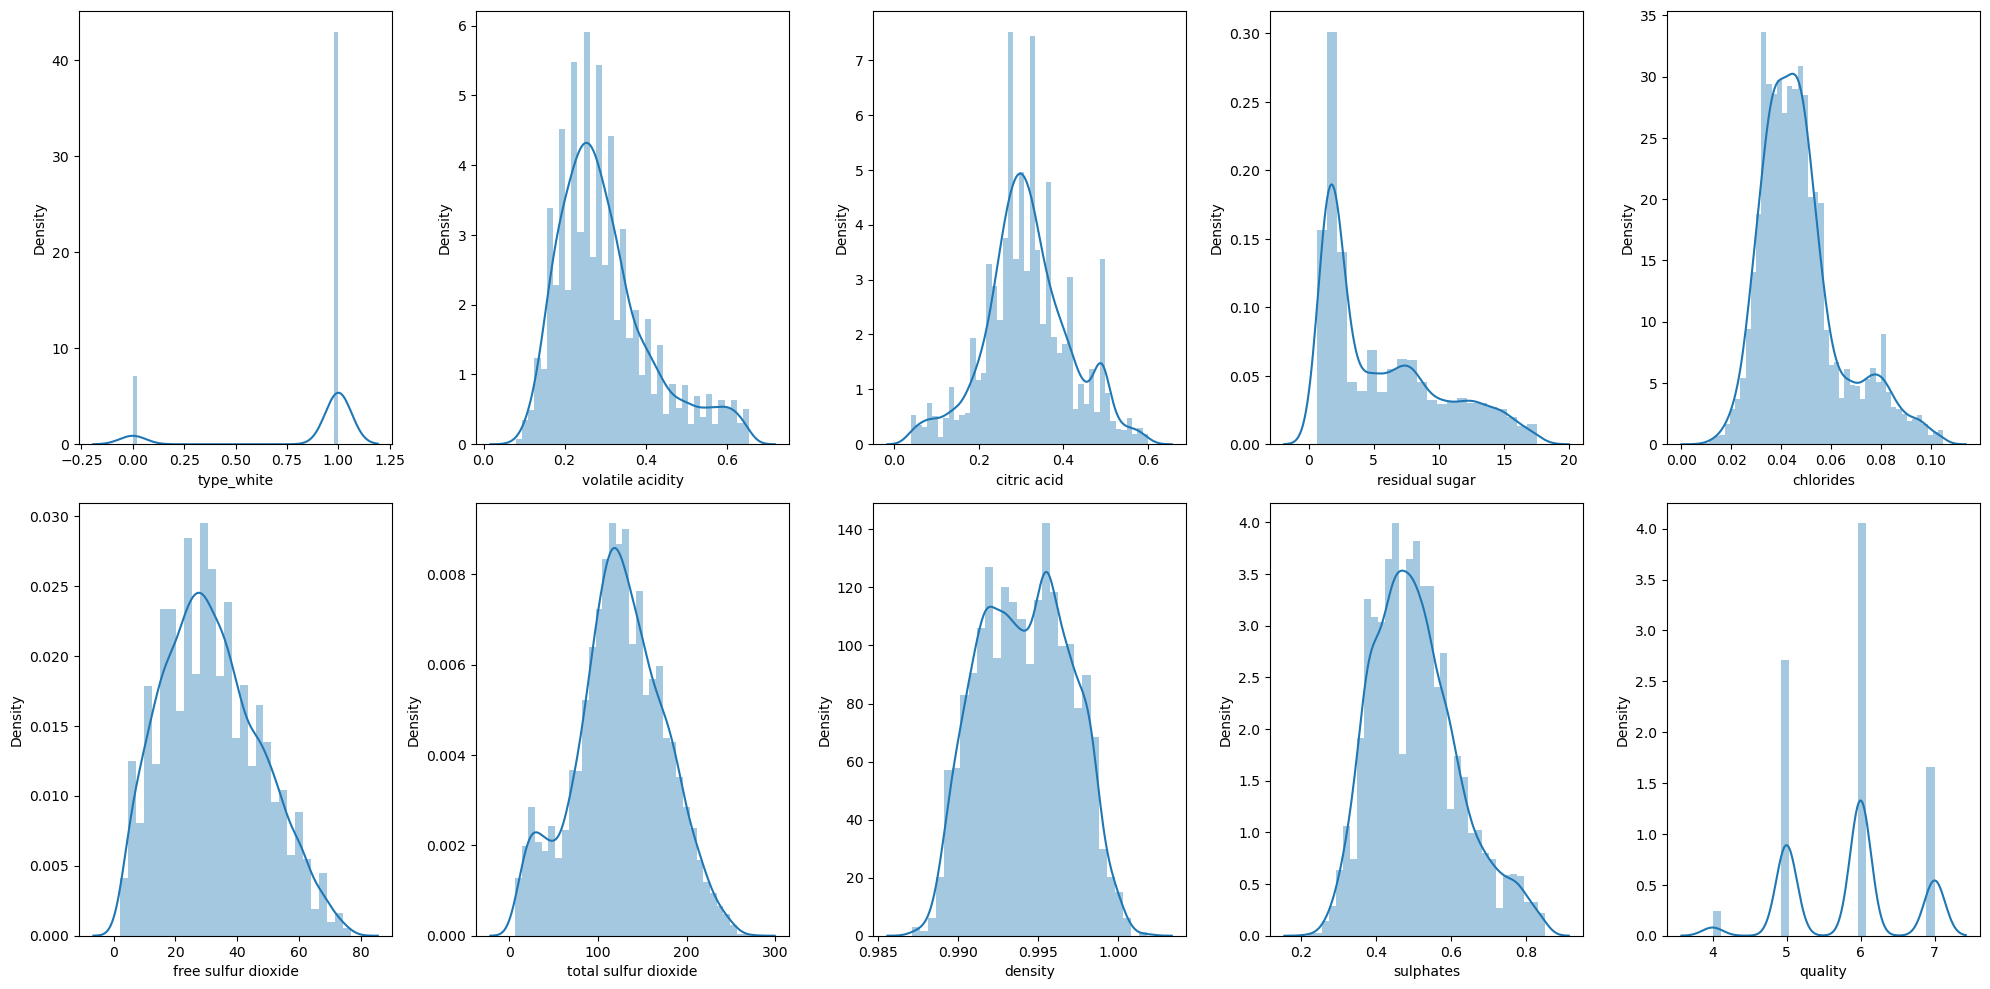

In [345]:
fig, ax= plt.subplots(2,5, figsize=(20,10))

for i, subplot in zip(final_df.columns, ax.flatten()):
    sns.distplot(final_df[i], ax=subplot,kde=True)
    
plt.tight_layout()
plt.show()

In [346]:
# From the plots , it is seen that there are still some variables with notable skewness. 
#So performing transformation to reduce skewness.

In [354]:
#temp_df1 = pd.DataFrame()
skew_cols = []
for i in final_df.columns:
    if final_df[i].skew()>0.8:
        #temp_df1[i]=final_df[i]
        skew_cols.append(i)
    

In [355]:
skew_cols # Heavily skewed columns

['volatile acidity', 'residual sugar', 'chlorides']

In [357]:
pt = PowerTransformer()

for i in skew_cols:
    trans_data = pt.fit_transform(pd.DataFrame(final_df[i]))
    final_df[i]=trans_data


In [358]:
final_df.skew()  # skew has been reduced further

type_white             -2.060602
volatile acidity        0.053524
citric acid             0.059889
residual sugar          0.081145
chlorides               0.032668
free sulfur dioxide     0.357161
total sulfur dioxide   -0.110634
density                 0.020947
sulphates               0.584556
quality                -0.064714
dtype: float64

In [359]:
X = final_df.drop('quality',axis=1)
y = final_df['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

trans_model = lr.fit(X_train,y_train)

y_pred = trans_model.predict(X_test)

In [360]:
print('RMSE train: ',np.sqrt(mean_squared_error(y_train,X_pred)))

RMSE train:  0.6541568233048888


In [361]:
print("r2:",r2_score(y_test,y_pred))

r2: 0.23606999741623547


In [ ]:
# Inferences :RMSE value is close to zero, so the model is overfit.

In [ ]:
'''-there can be  negligible outliers still present in the preprocessed dataset even after cleaning. 
So we can re-refine the dataset by including those outliers by transforming the distribution of the variables 
to near nromal by various transformation techniques,thus reducing the skewness further.

- perform appropriate transformation, and then build a new model with those transformed variables.'''